In [77]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [78]:
import os
# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정
if os.name == 'posix':

    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")

# 코스피 종목 DB에 넣기

In [3]:
stocks = fdr.StockListing('KOSPI') # 코스피
stocks.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [15]:
# '회사명':'Name', '종목코드':'Symbol', '업종':'Sector', '주요제품':'Industry', 
# '상장일':'ListingDate', '결산월':'SettleMonth',  '대표자명':'Representative', 
# '홈페이지':'HomePage', '지역':'Region'
stocks.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [16]:
stocks.shape

(6231, 10)

In [41]:
import sqlite3

conn = sqlite3.connect('stock.db')
cur = conn.cursor()

In [32]:
stocks.fillna("null",inplace = True)
stocks = stocks.astype('string')

In [42]:
for i in range(len(stocks)):
    cur.execute("""INSERT INTO kospi("Symbol", "Market", "Name", "Sector", "Industry", "ListingDate","SettleMonth", "Representative", "HomePage", "Region") VALUES (?,?,?,?,?,?,?,?,?,?);
    """, (stocks.iloc[i][0],stocks.iloc[i][1],stocks.iloc[i][2],stocks.iloc[i][3],stocks.iloc[i][4],stocks.iloc[i][5],stocks.iloc[i][6],stocks.iloc[i][7],stocks.iloc[i][8],stocks.iloc[i][9]))
conn.commit()
conn.close()

#  FinanceDataReader 살펴보기


In [45]:
# 삼성전자(005930) (2017 ~ 현재)
df = fdr.DataReader('005930', "2017")
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
...,...,...,...,...,...,...
2022-03-29,70000,70300,69800,70200,13686208,0.007174
2022-03-30,70300,70500,69800,69900,12670187,-0.004274
2022-03-31,69900,70200,69600,69600,12510366,-0.004292


<AxesSubplot:xlabel='Date'>

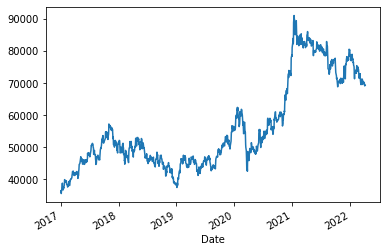

In [49]:
df["Close"].plot()

## 섹터 평균 수익률과 개별 종목의 수익률 구하기

### 한국 거래소의 전체 종목 가져오기

In [51]:
krx = fdr.StockListing('KRX')
krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7920,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7921,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7922,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시
7923,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [52]:
# 가장 종목수가 많은 섹터 30개
krx.groupby('Sector').count().sort_values('Symbol', ascending=False)[:30]

,Symbol,Market,Name,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
Sector,,,,,,,,,
소프트웨어 개발 및 공급업,154,154,154,153,154,154,154,150,154
특수 목적용 기계 제조업,146,146,146,146,146,146,146,142,146
전자부품 제조업,129,129,129,128,129,129,129,124,129
자동차 신품 부품 제조업,96,96,96,96,96,96,96,93,96
의약품 제조업,95,95,95,95,95,95,95,91,95
기타 금융업,94,94,94,92,94,94,94,81,94
기타 화학제품 제조업,93,93,93,93,93,93,93,88,93
금융 지원 서비스업,74,74,74,73,74,74,74,25,74
통신 및 방송 장비 제조업,72,72,72,72,72,72,72,67,72


In [59]:
krx[krx['Symbol']=='005930']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
4153,005930,KOSPI,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"한종희, 경계현",http://www.sec.co.kr,경기도


In [53]:
# 묶은(groupby)결과를 list와 dict로 변환하면 개별 섹터(Sector)별로 종목리스트를 구분
sectors = dict(list(krx.groupby('Sector')))

print('count:', len(sectors))
list(sectors.keys())[:10]

count: 161


['1차 비철금속 제조업',
 '1차 철강 제조업',
 '가구 제조업',
 '가전제품 및 정보통신장비 소매업',
 '가정용 기기 제조업',
 '가죽, 가방 및 유사제품 제조업',
 '개인 및 가정용품 임대업',
 '건물 건설업',
 '건물설비 설치 공사업',
 '건축기술, 엔지니어링 및 관련 기술 서비스업']

In [60]:
it_sec = sectors['통신 및 방송 장비 제조업']

print('row count:', len(it_sec))
it_sec.head(5)

row count: 72


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
74,065770,KOSDAQ,CS,통신 및 방송 장비 제조업,"이동통신중계기, 위성방송(DMB)중계기(Gap-Filler)",2004-06-04,12월,최규훈,http://www.cs-holdings.co.kr,경기도
101,079190,KOSDAQ,EMW,통신 및 방송 장비 제조업,휴대폰안테나,2005-11-29,12월,"이승준, LLOYD YEONSU LEE (각자 대표이사)",http://emw.co.kr,인천광역시
1703,066570,KOSPI,LG전자,통신 및 방송 장비 제조업,"이동통신단말기,C-TV,V.C.R.,컴퓨터,완전평면 TV,플라즈마 디스플레이 패널 ...",2002-04-22,12월,"조주완, 배두용 (각자 대표이사)",http://www.lge.co.kr,서울특별시
1812,218410,KOSDAQ,RFHIC,통신 및 방송 장비 제조업,GaN 트랜지스터,2015-06-30,12월,조덕수,http://rfhic.com,경기도


### 개별 종목의 가격 데이터 가져오기

In [64]:
it = pd.DataFrame()

for ix, row in it_sec.iterrows():
  code, name = row['Symbol'], row['Name']
  print(code, name)
  # 개별 종목의 가격을 가져옵니다
  df = fdr.DataReader(code, '2020-01-01', '2020-12-31')

  # 가격 데이터의 종가(Close)를 컬럼으로 추가합니다
  # (컬럼명은 종목명을 지정합니다)
  it[name] = df['Close']

211270 AP위성
065770 CS
079190 EMW
066570 LG전자
218410 RFHIC
192410 THQ
078890 가온미디어
029480 광무
035460 기산텔레콤
340360 다보링크
039560 다산네트웍스
008110 대동전자
000300 대유플러스
069540 라이트론
100590 머큐리
101330 모베이스
046310 백금T&A
121800 비덴트
005930 삼성전자
065570 삼영이엔씨
037460 삼지전자
032750 삼진
093920 서원인텍
178320 서진시스템
081580 성우전자
236200 슈프리마
094840 슈프리마에이치큐
033790 스카이문스테크놀로지
036710 심텍홀딩스
050890 쏠리드
245450 씨앤에스링크
058220 아리온
143160 아이디스
297570 알로이스
061040 알에프텍
097780 에스맥
096630 에스코넥
088800 에이스테크
224110 에이텍티앤
230240 에치에프알
073540 에프알텍
138080 오이솔루션
109080 옵티시스
115440 우리넷
140660 위월드
203450 유니온커뮤니티
264450 유비쿼스
078070 유비쿼스홀딩스
073490 이노와이어리스
215790 이노인스트루먼트
083640 인콘
049070 인탑스
189300 인텔리안테크
175140 인포마크
058450 일야
174880 장원테크
361390 제노코
032500 케이엠더블유
036690 코맥스
189350 코셋
056360 코위버
015710 코콤
134580 탑코미디어
091440 텔레필드
200230 텔콘RF제약
084730 팅크웨어
170790 파이오링크
038950 파인디지털
106240 파인테크닉스
062970 피피아이
039010 현대에이치티
005870 휴니드


In [65]:
# 72개 종목 '2020-01-01'~'2020-12-31' 종가(Close) 데이터를 수집
it

,AP위성,CS,EMW,LG전자,RFHIC,THQ,가온미디어,광무,기산텔레콤,다보링크,...,탑코미디어,텔레필드,텔콘RF제약,팅크웨어,파이오링크,파인디지털,파인테크닉스,피피아이,현대에이치티,휴니드
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,6970,2945,3105,71000,38198,6100,8129,1040,2155,2588,...,2390,3460,4930,7280,8810,3980,4270,12600,8000,7340
2020-01-03,7100,2975,3105,71100,35368,6100,8003,911,2270,2588,...,3105,3460,5080,7310,8710,3980,4285,13250,8000,7350
2020-01-06,7010,2885,3105,69900,34197,6100,7714,881,2270,2588,...,3280,3365,4800,7300,9170,3935,4140,13400,7770,7380
2020-01-07,7000,2925,3105,70300,32295,6100,7742,882,2275,2588,...,3200,3430,4955,7420,9040,3940,4090,11750,7840,7310
2020-01-08,6810,2810,3105,67500,30539,6100,7240,805,2320,2588,...,2890,3240,4655,7200,8800,3935,3905,10850,7650,8540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,7960,2480,3105,119500,41466,2350,6082,514,2570,2575,...,2430,3150,5810,12650,13100,6700,4000,6480,7960,5630
2020-12-24,7910,2445,3105,112000,42003,2385,6149,525,2570,2575,...,2580,3155,5700,11700,13250,6250,3975,6480,8000,5620
2020-12-28,7650,2415,3105,124500,42344,2385,6169,541,2550,2575,...,2620,3155,5680,11800,13150,6380,4030,6370,8200,5620


In [66]:
# 결측치 제거
it = it.dropna(axis=1)
it

,AP위성,CS,EMW,LG전자,RFHIC,THQ,가온미디어,광무,기산텔레콤,다보링크,...,탑코미디어,텔레필드,텔콘RF제약,팅크웨어,파이오링크,파인디지털,파인테크닉스,피피아이,현대에이치티,휴니드
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,6970,2945,3105,71000,38198,6100,8129,1040,2155,2588,...,2390,3460,4930,7280,8810,3980,4270,12600,8000,7340
2020-01-03,7100,2975,3105,71100,35368,6100,8003,911,2270,2588,...,3105,3460,5080,7310,8710,3980,4285,13250,8000,7350
2020-01-06,7010,2885,3105,69900,34197,6100,7714,881,2270,2588,...,3280,3365,4800,7300,9170,3935,4140,13400,7770,7380
2020-01-07,7000,2925,3105,70300,32295,6100,7742,882,2275,2588,...,3200,3430,4955,7420,9040,3940,4090,11750,7840,7310
2020-01-08,6810,2810,3105,67500,30539,6100,7240,805,2320,2588,...,2890,3240,4655,7200,8800,3935,3905,10850,7650,8540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,7960,2480,3105,119500,41466,2350,6082,514,2570,2575,...,2430,3150,5810,12650,13100,6700,4000,6480,7960,5630
2020-12-24,7910,2445,3105,112000,42003,2385,6149,525,2570,2575,...,2580,3155,5700,11700,13250,6250,3975,6480,8000,5620
2020-12-28,7650,2415,3105,124500,42344,2385,6169,541,2550,2575,...,2620,3155,5680,11800,13150,6380,4030,6370,8200,5620


### 수익률 계산

In [67]:
# 데이터의 첫날(1월 2일)을 기준으로 일일 누적 수익률 계산
acc_rets = it / it.iloc[0] - 1.0
acc_rets

,AP위성,CS,EMW,LG전자,RFHIC,THQ,가온미디어,광무,기산텔레콤,다보링크,...,탑코미디어,텔레필드,텔콘RF제약,팅크웨어,파이오링크,파인디지털,파인테크닉스,피피아이,현대에이치티,휴니드
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2020-01-03,0.018651,0.010187,0.0,0.001408,-0.074088,0.000000,-0.015500,-0.124038,0.053364,0.000000,...,0.299163,0.000000,0.030426,0.004121,-0.011351,0.000000,0.003513,0.051587,0.00000,0.001362
2020-01-06,0.005739,-0.020374,0.0,-0.015493,-0.104744,0.000000,-0.051052,-0.152885,0.053364,0.000000,...,0.372385,-0.027457,-0.026369,0.002747,0.040863,-0.011307,-0.030445,0.063492,-0.02875,0.005450
2020-01-07,0.004304,-0.006791,0.0,-0.009859,-0.154537,0.000000,-0.047607,-0.151923,0.055684,0.000000,...,0.338912,-0.008671,0.005071,0.019231,0.026107,-0.010050,-0.042155,-0.067460,-0.02000,-0.004087
2020-01-08,-0.022956,-0.045840,0.0,-0.049296,-0.200508,0.000000,-0.109362,-0.225962,0.076566,0.000000,...,0.209205,-0.063584,-0.055781,-0.010989,-0.001135,-0.011307,-0.085480,-0.138889,-0.04375,0.163488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,0.142037,-0.157895,0.0,0.683099,0.085554,-0.614754,-0.251814,-0.505769,0.192575,-0.005023,...,0.016736,-0.089595,0.178499,0.737637,0.486947,0.683417,-0.063232,-0.485714,-0.00500,-0.232970
2020-12-24,0.134864,-0.169779,0.0,0.577465,0.099613,-0.609016,-0.243572,-0.495192,0.192575,-0.005023,...,0.079498,-0.088150,0.156187,0.607143,0.503973,0.570352,-0.069087,-0.485714,0.00000,-0.234332
2020-12-28,0.097561,-0.179966,0.0,0.753521,0.108540,-0.609016,-0.241112,-0.479808,0.183295,-0.005023,...,0.096234,-0.088150,0.152130,0.620879,0.492622,0.603015,-0.056206,-0.494444,0.02500,-0.234332


In [69]:
# 종목별 12월 30일의 최종 수익률 큰 종목부터 나열
returns = acc_rets.iloc[-1]
returns.sort_values(ascending=False)

에이스테크    2.197880
에이텍티앤    1.524430
인탑스      1.266917
쏠리드      0.982172
LG전자     0.901408
           ...   
피피아이    -0.473810
장원테크    -0.510563
THQ     -0.600000
일야      -0.600350
아리온     -0.837758
Name: 2020-12-30 00:00:00, Length: 71, dtype: float64

In [71]:
# 수익률 상위 10
best10 = returns.sort_values(ascending=False).head(10)
best10

에이스테크      2.197880
에이텍티앤      1.524430
인탑스        1.266917
쏠리드        0.982172
LG전자       0.901408
이노와이어리스    0.811047
파인디지털      0.798995
씨앤에스링크     0.769231
팅크웨어       0.689560
유비쿼스       0.685355
Name: 2020-12-30 00:00:00, dtype: float64

In [73]:
it.loc['2020',best10.keys()]

,에이스테크,에이텍티앤,인탑스,쏠리드,LG전자,이노와이어리스,파인디지털,씨앤에스링크,팅크웨어,유비쿼스
Date,,,,,,,,,,
2020-01-02,8490,9210,13300,5497,71000,34400,3980,1950,7280,14715
2020-01-03,8650,9180,13000,5400,71100,34000,3980,1950,7310,14540
2020-01-06,8650,8940,12350,5147,69900,33300,3935,1950,7300,14089
2020-01-07,9440,9070,12500,5137,70300,33950,3940,1800,7420,14265
2020-01-08,9350,8680,11700,4913,67500,32800,3935,2000,7200,13514
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,25150,23100,26350,10507,119500,60900,6700,3000,12650,26050
2020-12-24,26100,22950,26900,10507,112000,61100,6250,3000,11700,25300
2020-12-28,26350,21950,29200,10215,124500,60000,6380,3000,11800,24150


In [74]:
import matplotlib as mpl
import numpy as np

def make_colors(n, colormap=plt.cm.Spectral):
    return colormap(np.linspace(0.1, 1.0, n))

In [75]:
# 코스피 200 지수
ks200 = fdr.DataReader('KS200', '2020-01-01', '2020-12-31')
ks200.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,290.35,294.19,294.57,289.96,66160000.0,-0.0116
2020-01-03,290.74,293.10,294.88,289.04,79770000.0,0.0013
2020-01-06,288.43,287.73,289.41,287.49,69960000.0,-0.0079
2020-01-07,291.23,290.01,292.26,289.64,65350000.0,0.0097
2020-01-08,289.42,288.94,291.01,287.30,124530000.0,-0.0062


<AxesSubplot:xlabel='Date'>

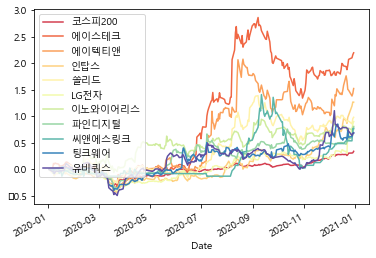

In [79]:
df_plot = pd.DataFrame()

df_plot['코스피200'] = ks200.loc['2020', 'Close'] # 코스피 200 지수
df_plot[best10.keys()] = it.loc['2020',best10.keys()] # 10개 종목

df_plot = df_plot / df_plot.iloc[0] - 1
df_plot.plot(color=make_colors(11))